In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数 f(x) = x^2 + 2
def objective_function(x):
    return x**2 + 2# 目标函数

# 定义目标函数的导数 f'(x) = 2x
def derivative(x):
    return 2*x

# 梯度下降参数
learning_rate = 0.1  # 学习率
num_iterations = 100  # 迭代次数
x = 5.0  # 初始值

# 存储每次迭代的x值和对应的函数值
x_history = [x]
f_history = [objective_function(x)]

# 执行梯度下降
for i in range(num_iterations):
    grad = derivative(x)  # 计算当前点的梯度
    x = x - learning_rate * grad  # 更新x值
    print(f"第{i+1}次迭代: x = {x:.2f}, f(x) = {objective_function(x):.2f}")
    # 记录历史
    x_history.append(x)
    f_history.append(objective_function(x))

# 可视化结果
plt.figure(figsize=(12, 5))

# 绘制目标函数
x_plot = np.linspace(-6, 6, 100)
y_plot = objective_function(x_plot)
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


# 左图：显示目标函数和优化路径
plt.subplot(1, 2, 1)
plt.plot(x_plot, y_plot, 'b-', label='f(x) = x^2 + 2')
plt.plot(x_history, f_history, 'ro-', label='优化路径')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('梯度下降优化过程')
plt.legend()
plt.grid(True)

# 右图：显示x值的收敛过程
plt.subplot(1, 2, 2)
plt.plot(range(len(x_history)), x_history, 'g-')
plt.xlabel('迭代次数')
plt.ylabel('x值')
plt.title('x值的收敛过程')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"初始点: x = {x_history[0]:.2f}, f(x) = {f_history[0]:.2f}")
print(f"最终点: x = {x_history[-1]:.2f}, f(x) = {f_history[-1]:.2f}")


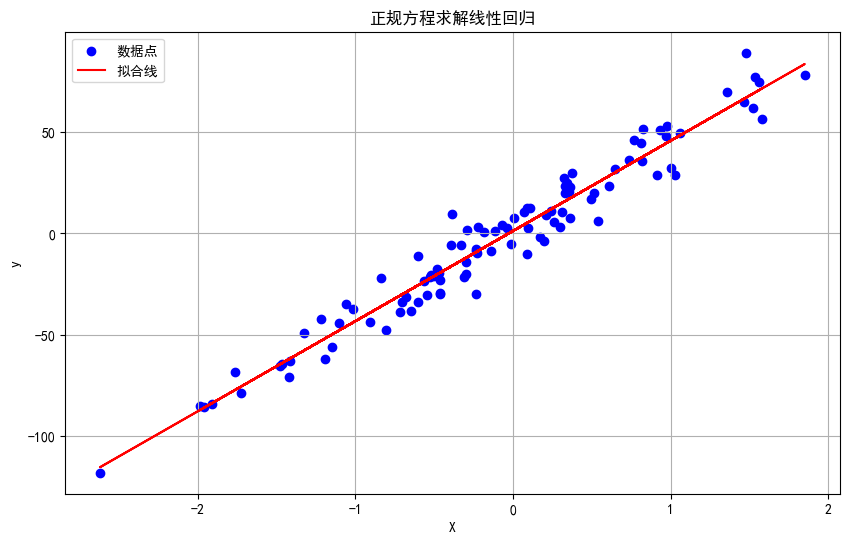

截距: 1.17
斜率: 44.44


In [5]:
# 正规方程示例：线性回归
import numpy as np
from sklearn.datasets import make_regression#make_regression是生成回归数据集的函数
import matplotlib.pyplot as plt

# 生成示例数据
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)#生成100个样本，1个特征，噪声为10，随机种子为42

# 添加偏置项
X_b = np.c_[np.ones((100, 1)), X]#np.c_是按列连接两个矩阵，np.ones((100, 1))是生成100行1列的1

# 使用正规方程求解
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)#np.linalg.inv是求逆矩阵

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='数据点')
plt.plot(X, theta[0] + theta[1] * X, color='red', label='拟合线')
plt.xlabel('X')
plt.ylabel('y')
plt.title('正规方程求解线性回归')
plt.legend()
plt.grid(True)
plt.show()

print(f"截距: {theta[0]:.2f}")
print(f"斜率: {theta[1]:.2f}")


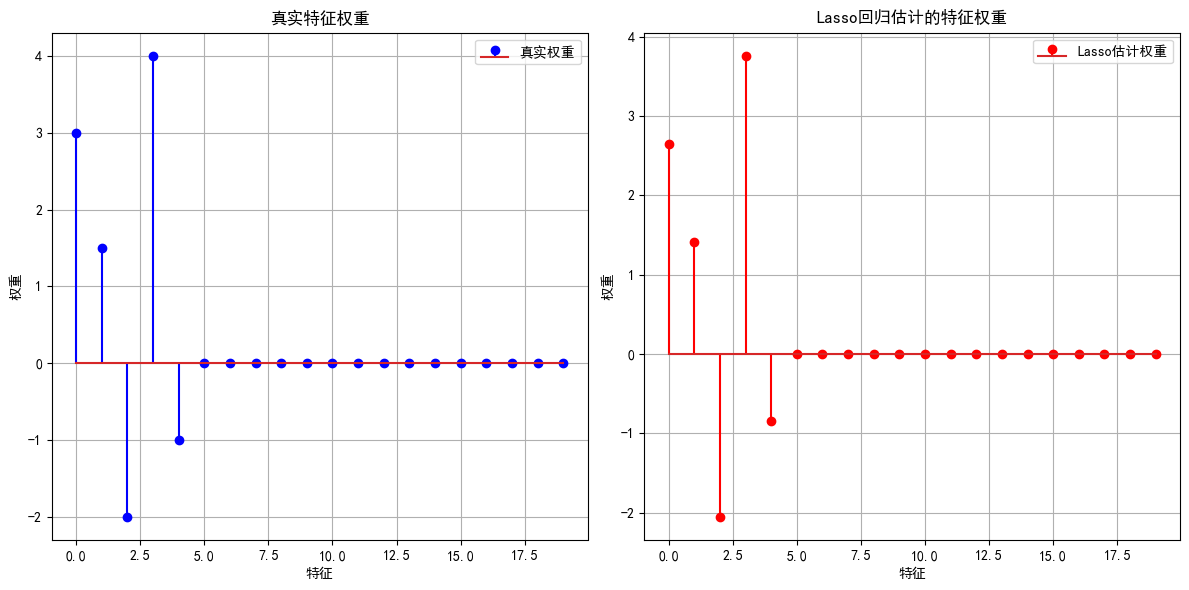

非零权重的数量: 5
模型得分: 0.9977


In [6]:
# L1正则化(Lasso回归)示例
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
np.random.seed(42)#设置随机种子用于生成随机数   
X = np.random.randn(100, 20)  # 100个样本，20个特征
true_weights = np.zeros(20)    # 真实权重，zeros(20)生成20个0
true_weights[:5] = [3, 1.5, -2, 4, -1]  # 只有前5个特征是有用的
y = np.dot(X, true_weights) + np.random.randn(100) * 0.1#np.dot是矩阵乘法

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)#fit_transform是拟合和转换

# 使用Lasso回归
lasso = Lasso(alpha=0.1)  # alpha是正则化强度
lasso.fit(X_scaled, y)

# 可视化特征权重
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.stem(true_weights, label='真实权重', linefmt='b-', markerfmt='bo')
plt.xlabel('特征')
plt.ylabel('权重')
plt.title('真实特征权重')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.stem(lasso.coef_, label='Lasso估计权重', linefmt='r-', markerfmt='ro')
plt.xlabel('特征')
plt.ylabel('权重')
plt.title('Lasso回归估计的特征权重')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 打印非零权重的数量
print(f"非零权重的数量: {np.sum(lasso.coef_ != 0)}")
print(f"模型得分: {lasso.score(X_scaled, y):.4f}")
